# Plotting data with Python - `matplotlib`

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Simple Plotting

In [2]:
t = np.linspace(0,2,100)               # 100 points linearly spaced between 0.0 and 2.0
s = np.cos(2*np.pi*t) * np.exp(-t)     # s if a function of t

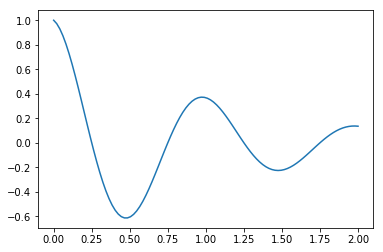

In [3]:
plt.plot(t,s)

### Simple plotting - with *style*

The default style of `matplotlib` is a bit lacking in style. Some would term it ugly. The new version of `matplotlib` has added some new styles that you can use in place of the default. Changing the style will effect all of the rest of the plots on the notebook.

Examples of the various styles can be found [here](http://matplotlib.org/examples/style_sheets/style_sheets_reference.html)

In [0]:
plt.style.available

In [0]:
plt.style.use('ggplot')

In [0]:
plt.plot(t,s)

In [0]:
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('This is a title')

plt.ylim(-1.5,1.5)

plt.plot(t, s, color='b', marker='None', linestyle='--');   # adding the ';' at then suppresses the Out[] line

In [0]:
mask1 = np.where((s>-0.4) & (s<0))

plt.plot(t, s, color='b', marker='None', linestyle='--')

plt.plot(t[mask1],s[mask1],color="g",marker="o",linestyle="None",markersize=8);

### In addition, you can specify colors in many different ways:

- Grayscale intensities: `color = '0.8'`
- RGB triplets: `color = (0.3, 0.1, 0.9)`
- RGB triplets (with transparency): `color = (0.3, 0.1, 0.9, 0.4)`
- Hex strings: `color = '#7ff00'`
- [HTML color names](https://en.wikipedia.org/wiki/Web_colors): `color = 'Chartreuse'`
- a name from the [xkcd color survey](https://xkcd.com/color/rgb/) prefixed with 'xkcd:' (e.g., 'xkcd:poison green')

### Simple Histograms

In [0]:
#Histogram of "h" with 20 bins

np.random.seed(42)
h = np.random.randn(500)

plt.hist(h, bins=20, facecolor='MediumOrchid');

In [0]:
mask2 = np.where(h>0.0)

np.random.seed(42)
j = np.random.normal(2.0,1.0,300)  # normal dist, ave = 2.0, std = 1.0

plt.hist(h[mask2], bins=20, facecolor='#b20010', histtype='stepfilled')
plt.hist(j,        bins=20, facecolor='#0200b0', histtype='stepfilled', alpha = 0.30);

## You have better control of the plot with the `object oriented` interface.

While most ``plt`` functions translate directly to ``ax`` methods (such as ``plt.plot()`` → ``ax.plot()``, ``plt.legend()`` → ``ax.legend()``, etc.), this is not the case for all commands.
In particular, functions to set limits, labels, and titles are slightly modified.
For transitioning between matlab-style functions and object-oriented methods, make the following changes:

- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

In [0]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape

fig.tight_layout()                          # Make better use of space on plot

ax.set_xlim(0.0,1.5)

ax.spines['bottom'].set_position('zero')    # Move the bottom axis line to x = 0

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

ax.plot(t, s, color='b', marker='None', linestyle='--')

ax.text(0.8, 0.65, 'Bad Wolf', color='green', fontsize=36)            # You can place text on the plot

ax.vlines(0.4, -0.4, 0.8, color='m', linewidth=3)                    # vlines(x, ymin, ymax)
ax.hlines(0.8,  0.2, 0.6, color='y', linewidth=5)                    # hlines(y, xmin, xmax)

In [0]:
fig.savefig('fig1.png', bbox_inches='tight')

In [0]:
!ls fig*

### Plotting from multiple external data files
 * `glob` is a small library for pattern matching filenames

In [0]:
import glob

In [0]:
data_list = glob.glob('./Data/12_data*.csv')

data_list

In [0]:
for value in data_list:
    print(value)

In [0]:
fig,ax = plt.subplots(1,1)                    # One window
fig.set_size_inches(11,8.5)                   # (width,height) - letter paper landscape

fig.tight_layout()                            # Make better use of space on plot

ax.set_xlim(0.0,80.0)
ax.set_ylim(15.0,100.0)

ax.set_xlabel("This is X")
ax.set_ylabel("This is Y")

for value in data_list:
    
    data = pd.read_csv(value)
    ax.plot(data['x'], data['y'],marker="o",linestyle="None",markersize=7,label=value)
    
ax.legend(loc=0,shadow=True);

### Subplots
- `subplot(rows,columns)`
- Access each subplot like a matrix. `[x,y]`
- For example: `subplot(2,2)` makes four panels with the coordinates:

In [0]:
fig, ax = plt.subplots(2,2)                                               # 2 rows 2 columns
fig.set_size_inches(11,8.5)                                               # width, height

fig.tight_layout()                                                        # Make better use of space on plot

ax[0,0].plot(t, s, color='b', marker='None', linestyle='--')              # Plot at [0,0]

ax[0,1].hist(h, bins=20, facecolor='MediumOrchid')                        # Plot at [0,1]

ax[1,0].hist(j,bins=20, facecolor='HotPink', histtype='stepfilled')       # Plot at [1,0]
ax[1,0].vlines(2.0, 0.0, 50.0, color='xkcd:seafoam green', linewidth=3)

ax[1,1].set_xscale('log')                                                 # Plot at [1,1] - x-axis set to log
ax[1,1].plot(t, s, color='r', marker='None', linestyle='--'); 

### Subplots with one row do not need a first index (`[0,0] -> [0]`)

In [0]:
fig, ax = plt.subplots(1,2)                                               # 1 row1 2 columns
fig.set_size_inches(11,4)                                                 # width, height

fig.tight_layout()                                                        # Make better use of space on plot

ax[0].plot(t, s, color='b', marker='None', linestyle='--')                # Plot at [0]

ax[1].hist(h, bins=20, facecolor='MediumOrchid');                         # Plot at [1]

---

## An Astronomical Example - Color Magnitude Diagrams

In [0]:
star_table = pd.read_csv('./Data/M15_Bright.csv')
star_table[0:3]

In [0]:
fig, ax = plt.subplots(1,1)                 # 1 row, 2 colums
fig.set_size_inches(15,10)

fig.tight_layout()

V = star_table['Vmag']
B = star_table['Bmag']
BV = B-V

ax.set_xlim(-0.25,1.5)
ax.set_ylim(12,19)

ax.set_aspect(1/6)         # Make 1 unit in X = 6 units in Y
ax.invert_yaxis()          # Magnitudes increase to smaller values

ax.set_xlabel("B-V")
ax.set_ylabel("V")

ax.plot(BV,V,color="b",marker="o",linestyle="None",markersize=5);

# overplotting

mask_color = ((V < 16.25) & (BV < 0.55))    # Remember - panads masks do not need np.where()

ax.plot(BV[mask_color], V[mask_color],color="r",marker="o",linestyle="None",markersize=4, alpha=0.5);

---

## A Common astronomical annoyance

The data is a list of standard stars from the article [UBVRI photometric standard stars around the celestial equator](http://adsbit.harvard.edu//full/1983AJ.....88..439L/0000444.000.html) (Landolt 1983 AJ)

In [0]:
standard_table = pd.read_csv('./Data/StandardStars.csv')

In [0]:
standard_table[0:3]

In [0]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

fig.tight_layout()

ax.invert_xaxis()          # RA is backward

ax.set_xlabel("RA")
ax.set_ylabel("Dec")

ax.plot(standard_table["RA"],standard_table["Dec"],color="b",marker="o",linestyle="None",markersize=5);

#### No negative Declinations!

In [0]:
my_dec = standard_table["Dec"].values
my_dec_sign = standard_table["DecSign"].values

neg_mask = np.where(my_dec_sign == "-")

my_dec[neg_mask] *= -1

In [0]:
fig, ax = plt.subplots(1,1)
fig.set_size_inches(12,5)

fig.tight_layout()

ax.invert_xaxis()          # RA is backward

ax.set_xlabel("RA")
ax.set_ylabel("Dec")

ax.plot(standard_table["RA"],my_dec,color="b",marker="o",linestyle="None",markersize=5);

#### Negative Declinations!

---
# Alternative Projections

## Polar Plots

In [4]:
theta = np.linspace(0,2*np.pi,1000)

#### The axis (`ax`) command is a bit different for alternative projections:

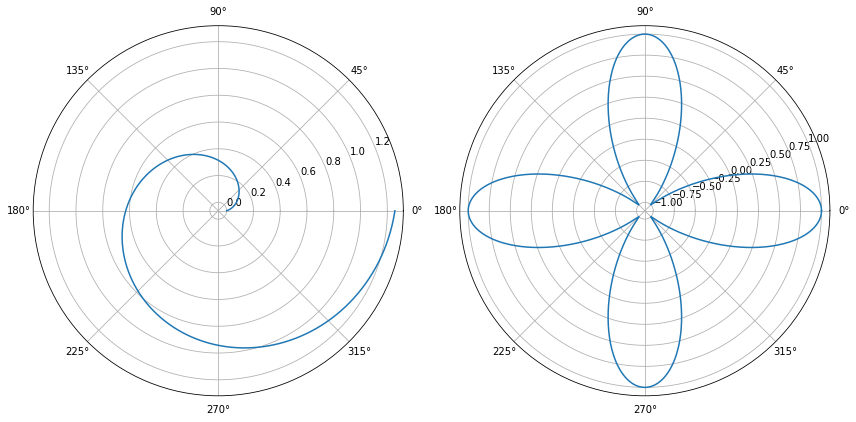

In [5]:
fig = plt.figure()

ax1 = fig.add_subplot(121,projection='polar')
ax2 = fig.add_subplot(122,projection='polar')

fig.set_size_inches(12,6)

fig.tight_layout()

ax1.plot(theta,theta/5.0,label="spiral")

ax2.plot(theta,np.cos(4*theta),label="flower");

## 3D plots

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')

fig.set_size_inches(9,9)

fig.tight_layout()

xx = np.cos(3*theta)
yy = np.sin(2*theta)

ax.plot(theta, xx, yy, c = "Maroon")
ax.scatter(theta, xx, yy, c = "Navy", s = 15);

ax.view_init(azim = -20, elev = 33)

## Tons of examples of `matplotlib` plots can be found [here](http://matplotlib.org/gallery.html)